# Homework 2

## 2)

Starting from the work in the pdf;

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, tan
import math
import random

In [62]:
pi_mass = 0.135
#theta_0 = math.pi/2
theta_0s = []
energies = [0.3, 1.0, 5.0, 50.0, 200.0]
for i in range(0,5000):
    #theta_0s.append(random.randrange(-math.pi, math.pi))
    rand_num = random.randrange(-180, 180)
    rand_num = rand_num * (math.pi/180.0)
    theta_0s.append(rand_num)

thetas = [[None] * len(theta_0s)] * len(energies)

Text(0, 0.5, 'Count')

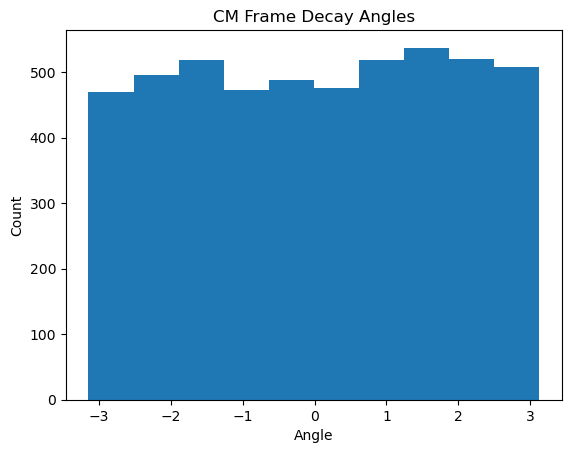

In [63]:
plt.hist(theta_0s)
plt.title("CM Frame Decay Angles")
plt.xlabel("Angle")
plt.ylabel("Count")

In [64]:
for i, energy, in enumerate(energies):
     theta_energy = []
     for j, angle in enumerate(theta_0s):
          gamma = energies[i]/pi_mass
          beta = math.sqrt((gamma**2-1)/gamma**2)
          #print(beta)
          cos_theta_lab = (cos(theta_0s[j])+beta)/(1+cos(theta_0s[j])*beta)
          theta_lab = math.acos(cos_theta_lab)
          #thetas[i].append(theta_lab)
          theta_energy.append(theta_lab)

     thetas[i]= theta_energy

In [65]:
print(thetas)

[[0.3359249274839156, 0.2207946401165961, 0.10530257980542998, 0.5807989027035394, 0.9808203135448682, 0.04158862132415322, 0.24106871103748415, 0.4289496256608672, 0.24106871103748415, 0.7811603533065103, 2.502155977236563, 2.9221631517502473, 2.4362808782531595, 0.7955256756948728, 0.8730473088844266, 0.17728964707235953, 0.14059632057730684, 0.4289496256608672, 0.04995917034642985, 1.4866150919122498, 0.01660195276997624, 0.21582364259185494, 0.5907217468610529, 0.21582364259185494, 2.707604332322625, 0.17261201440775903, 0.7142722603903489, 1.2632537895978027, 0.21582364259185494, 0.2620248818673924, 0.4908958105473175, 0.01660195276997624, 0.8102508183825005, 2.24769678276101, 1.0006206714065364, 0.7270321861338883, 0.0795175439193118, 0.28930810976941196, 0.677668816335709, 0.18199594131792507, 0.46676533904729617, 2.994998249308595, 0.1867318322909202, 0.7270321861338883, 0.7400892796093044, 0.20112673500058215, 2.1880380749081283, 0.6111540545911295, 0.5710628649196484, 0.31212

Text(0.5, 1.0, 'Lab Frame Decay Angles for Various Energies')

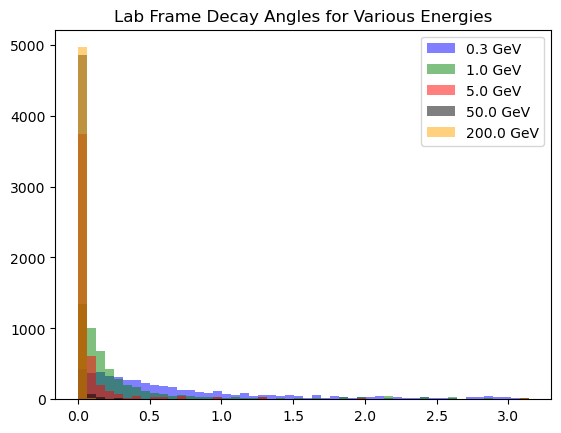

In [66]:
fig, ax = plt.subplots()
facecolors = ["Blue", "Green", "Red", "Black", "Orange"]

for i in range(len(facecolors)):
    ax.hist(thetas[i], bins=50, alpha=0.5, label=f"{energies[i]} GeV", facecolor=facecolors[i], histtype='stepfilled')

ax.legend()
ax.set_title(r"Lab Frame Decay Angles for Various Energies")


As the $\pi^0$ becomes more energetic, the resulting photons from decay will be increasingly colomated in the original direction of travel.

For the specific case $\epsilon=0.4789\text{ GeV}$ we can figure out what fraction will be in the forward direction $|{\theta}|\leq\pi/2$

In [82]:
epsilon = 0.4789
gamma = epsilon/pi_mass
beta = math.sqrt((gamma**2-1)/gamma**2)
counts = 0

for j in range(len(theta_0s)):
    lab_cos_theta = (cos(theta_0s[j])+beta)/(1+cos(theta_0s[j])*beta)
    theta_lab = math.acos(lab_cos_theta)
    if theta_lab <= math.pi/2:
        counts+=1

print(counts/5000)

0.91


We can see that over $\percent{}90$ of the photons are emitted in the forward direction at only $0.4789\text{ GeV}$.

## 5)

We can say that; from the Bethe-Bloche formula